### Importing Libraries

In [188]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,recall_score,f1_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Exploring Data

In [171]:
df = pd.read_csv('data/Tweets.csv')

## Data Cleaning and preparation

In [172]:
# airline_sentiment, text
df = df[['text','airline_sentiment']]

In [173]:
# df['text'][0].replace(f'[{string.punctuation}]','',regex=True)
df.loc[:,'text'] = df['text'].str.lower().replace(f'[{string.punctuation}]','',regex=True)

## Model Building and Training 

In [174]:
x_train, x_test, y_train, y_test = train_test_split(df['text'],df['airline_sentiment'],test_size=0.25)

In [175]:
cntvect = CountVectorizer(ngram_range=(1,2),stop_words='english')
tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words='english')

cntvect.fit(df['text'])
tfidf.fit(df['text'])

x_train_vect = cntvect.transform(x_train)
x_test_vect = cntvect.transform(x_test)

x_train_tfidf = tfidf.transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

### Functions 

In [176]:
info_metrics = []
def metrics(model, y_test,predictions):
    accuracy = accuracy_score(y_test,predictions)
    precision = precision_score(y_test,predictions,average='weighted')
    recall = recall_score(y_test,predictions,average='weighted')
    f1 = f1_score(y_test,predictions,average='weighted')
    
    info_metrics.append([model, accuracy,precision,recall,f1])

def plot_cm(model, y_test,predictions):
    cm = confusion_matrix(y_test,predictions)
    disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues')
    plt.title(model)
    plt.show()

### Multinomial - balanced

In [177]:
temp = len(df)/df['airline_sentiment'].value_counts()
weights = (temp).values/sum(temp)

In [178]:
multi1 = MultinomialNB(class_prior=weights)
multi1.fit(x_train_vect,y_train)
predictions_1 = multi1.predict(x_test_vect)
metrics('multinomial balanced countvect',y_test,predictions_1)

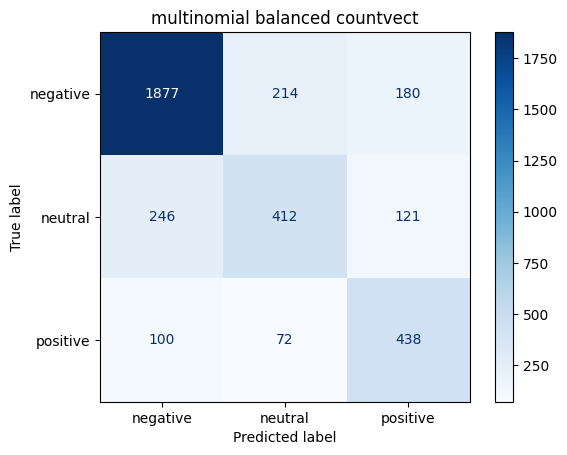

In [179]:
plot_cm('multinomial balanced countvect',y_test,predictions_1)

### Multinomial - balanced - tfidf

In [180]:
temp = len(df)/df['airline_sentiment'].value_counts()
weights = (temp).values/sum(temp)

In [181]:
multi3 = MultinomialNB(class_prior=weights)
multi3.fit(x_train_tfidf,y_train)
predictions_3 = multi3.predict(x_test_tfidf)
metrics('multinomial balanced tfidf',y_test,predictions_3)

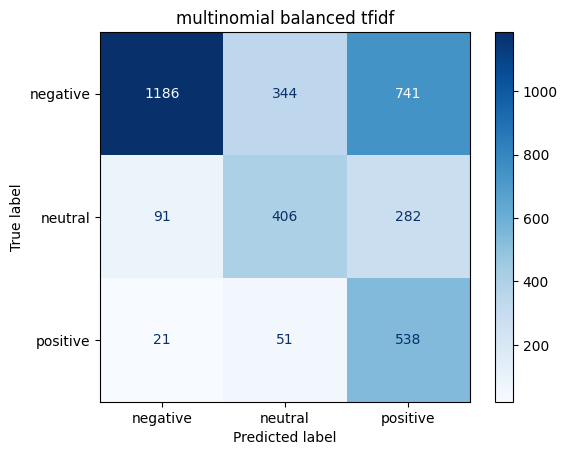

In [182]:
plot_cm('multinomial balanced tfidf',y_test,predictions_3)

### Multinomial

In [183]:
multi2 = MultinomialNB()
multi2.fit(x_train_vect,y_train)
predictions_2 = multi2.predict(x_test_vect)
metrics('multinomial countvect',y_test,predictions_2)

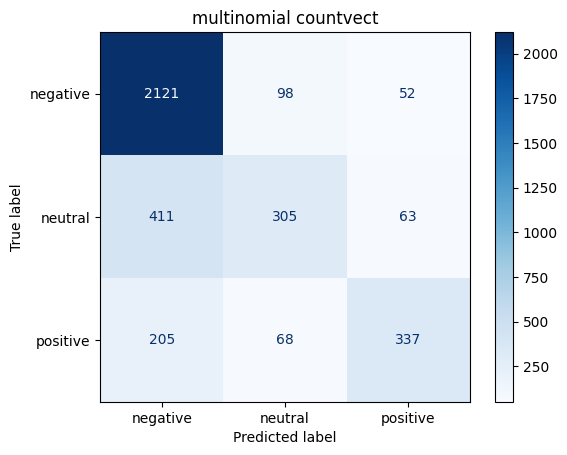

In [184]:
plot_cm('multinomial countvect',y_test,predictions_2)

### Multinomial - tfidf

In [185]:
multi4 = MultinomialNB()
multi4.fit(x_train_tfidf,y_train)
predictions_4 = multi4.predict(x_test_tfidf)
metrics('multinomial tfidf',y_test,predictions_4)

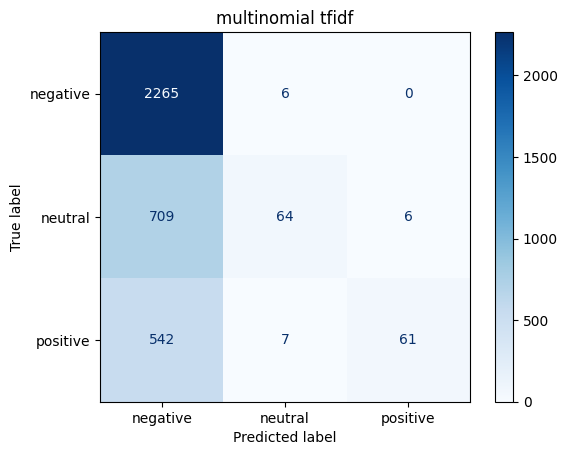

In [186]:
plot_cm('multinomial tfidf',y_test,predictions_4)

### Results

In this analysis, two versions of the multinomial model were compared: a balanced one and an unbalanced one. About CountVectorizer, while the unbalanced model showed a slight advantage in terms of overall accuracy and precision, the balanced multinomial model performed better in predicting all three classes equally, reflected in a more balanced confusion matrix. This indicates that for datasets with unbalanced classes, using balanced models may be crucial to improve performance across all classes, rather than optimizing global metrics that might favor the majority classes.

In [187]:
pd.DataFrame(info_metrics,columns=['model','accuracy','precision','recall','f1'])

,model,accuracy,precision,recall,f1
0,multinomial balanced countvect,0.745082,0.748329,0.745082,0.745289
1,multinomial balanced tfidf,0.581967,0.732276,0.581967,0.604375
2,multinomial countvect,0.754918,0.742931,0.754918,0.735226
3,multinomial tfidf,0.653005,0.728368,0.653005,0.547575
